In [1]:
#%load_ext autoreload
#%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
from config import plot_folder, res_folder

In [4]:
n_init = 100
n_query = 16
seed = 42

In [5]:
methods = ["RandomSampling", "BALDDropout", "EntropySampling","KCenterGreedy"]

In [6]:
res=dict()
res_ps = []
for method in methods:
    res[method] = np.load(f"{res_folder}/controlled/from_scratch/{n_init}_{n_query}_{seed}/{method}/result.npz")
    if method=="RandomSampling":
        res_p = np.load(f"{res_folder}/controlled/from_scratch/{n_init}_{n_query}_{seed}/{method}/results_perfect_3.npz")
        res_ps.append(res_p["dataset_ious"])


RandomSampling
0.01775952
BALDDropout
0.021478882
EntropySampling
0.032692775
KCenterGreedy
0.017145855


Text(0.5, 1.0, 'seed=42')

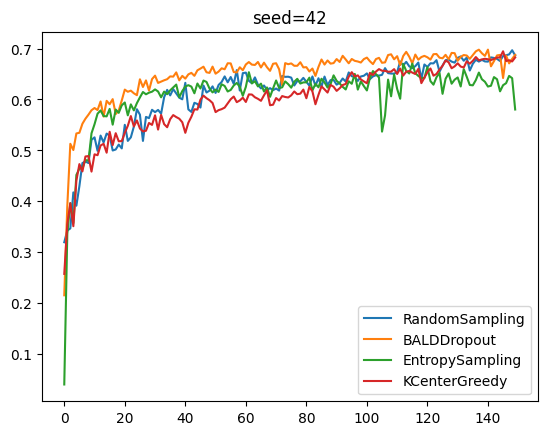

In [7]:
for method in methods:
    print(method)
    plt.plot(res[method]["dataset_ious"])
    print(np.std(np.diff(res[method]["dataset_ious"])))

plt.axhspan(np.min(res_ps), np.max(res_ps), facecolor="gray", alpha=0.25, label="All data")

plt.legend(methods)
plt.title(f"seed={seed}")

RandomSampling
0.01775952
BALDDropout
0.021478882
EntropySampling
0.032692775
KCenterGreedy
0.017145855


Text(0.5, 1.0, 'seed=42')

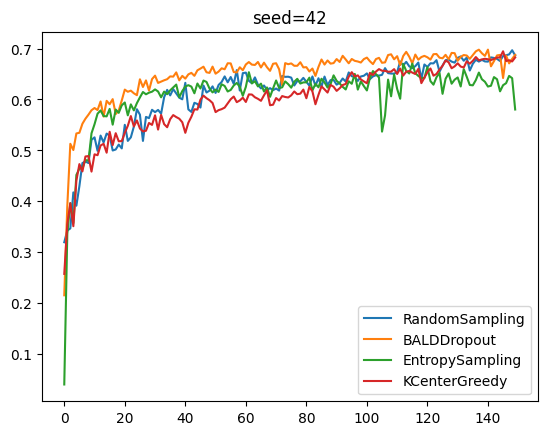

In [8]:
for method in methods:
    print(method)
    plt.plot(res[method]["dataset_ious"])
    print(np.std(np.diff(res[method]["dataset_ious"])))

plt.axhspan(np.min(res_ps), np.max(res_ps), facecolor="gray", alpha=0.25, label="All data")

plt.legend(methods)
plt.title(f"seed={seed}")

RandomSampling
0.01775952
BALDDropout
0.021478882
EntropySampling
0.032692775
KCenterGreedy
0.017145855


Text(0.5, 1.0, 'seed=42')

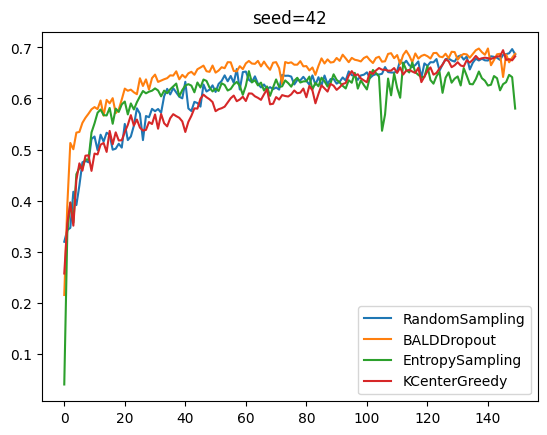

In [9]:
for method in methods:
    print(method)
    plt.plot(res[method]["dataset_ious"])
    print(np.std(np.diff(res[method]["dataset_ious"])))
plt.legend(methods)
plt.title(f"seed={seed}")

# different seeds

In [10]:
from config import seeds, res_folder

In [11]:
methods = ["RandomSampling", "BALDDropout", "EntropySampling","KCenterGreedy"] #, 


In [12]:
from collections import defaultdict
res=defaultdict(dict)
for seed in seeds:
    for method in methods:
        res[seed][method] = np.load(f"{res_folder}/controlled/from_scratch/{n_init}_{n_query}_{seed}/{method}/result.npz")

In [13]:
n_round = 16

In [14]:
method_nice = {
 "RandomSampling":"Random",
"EntropySampling": "Entropy"   
}

In [15]:
res_before=defaultdict(dict)
for method in ["RandomSampling","EntropySampling"]:
    for seed in seeds:
        res_before[seed][method] = np.load(f"{res_folder}/controlled/from_scratch/{n_init}_{n_query}_{seed}/{method}/result.npz")



In [16]:
from config import method_names_dict, methods
methods

['RandomSampling', 'BALDDropout', 'EntropySampling', 'KCenterGreedy']

RandomSampling:STD:0.06542106717824936
BALDDropout:STD:0.055246751755476
EntropySampling:STD:0.05540774390101433
KCenterGreedy:STD:0.06409627944231033


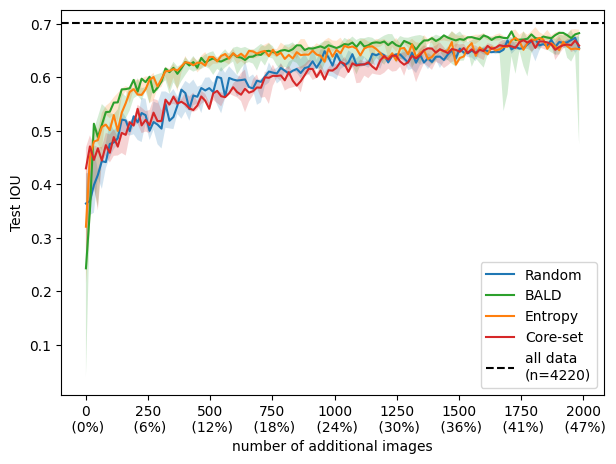

In [17]:
from collections import defaultdict

x_idx = 125
all_data = 4220
fig, axs = plt.subplots(1, 1, figsize=(7,5))


res=defaultdict(dict)
res_ps = []
for seed in seeds:
    for method in methods:
        res[seed][method] = np.load(f"{res_folder}/controlled/from_scratch/{n_init}_{n_query}_{seed}/{method}/result.npz")
        if method=="RandomSampling":
            res_p = np.load(f"{res_folder}/controlled/from_scratch/{n_init}_{n_query}_{seed}/{method}/results_perfect_3.npz")
            res_ps.append(res_p["dataset_ious"])
        
round_imgs = np.array(range(75))*16
method_col = {
    "RandomSampling":"#1f77b4",
    "EntropySampling":"#ff7f0e",
    "BALDDropout":"#2ca02c",
    "KCenterGreedy":"#d62728"
}

for method in methods:
    v = np.array([res[seed][method]["dataset_ious"] for seed in seeds])
    print(f"{method}:STD:{np.mean(np.std(v, axis=1))}")
    xs =  np.array(range(x_idx))*16
    axs.plot(xs, np.median(v,axis=0)[0:x_idx], label=method_names_dict[method], color=method_col[method])
    #axs.plot(xs, np.min(v,axis=0), color=method_col[method])
    #axs.plot(xs, np.max(v,axis=0), color=method_col[method])
    axs.fill_between(xs, np.min(v,axis=0)[0:x_idx], np.max(v,axis=0)[0:x_idx], alpha=.2)
    axs.set_xlabel("number of additional images")
    axs.set_ylabel("Test IOU")


x_ticks = axs.get_xticks()[1:-1]

new_labels = [f"{int(tick)}\n ({(tick/all_data)*100:.0f}%)" for tick in x_ticks]
axs.set_xticks(x_ticks)
axs.set_xticklabels(new_labels)

rand_vals = [res_before[seed]["RandomSampling"]["dataset_ious"][-1] for seed in seeds]
ent_vals = [res_before[seed]["EntropySampling"]["dataset_ious"][-1] for seed in seeds]

#plt.axhspan(np.min(rand_vals), np.max(rand_vals), 
#           facecolor="#1f77b4", alpha=0.25,
#           label="Value range random sampling (positives)")


#plt.axhspan(np.min(ent_vals), np.max(ent_vals), 
#            facecolor="#ff7f0e", alpha=0.25,
#           label="Value range entropy sampling (positives)")

plt.axhline(np.median(res_ps), color="black", label=f"all data\n(n={all_data})", linestyle="--")


#plt.axhspan(np.min(res_ps), np.max(res_ps), 
#            facecolor="gray", alpha=0.25,
#           label="All data")

#plt.axhline(np.min(res_ps))
plt.legend()
plt.savefig(f"{plot_folder}/from_scratch_controlled2.pdf", bbox_inches="tight")

0.54680926
3
3
[-500.    0.  500. 1000. 1500. 2000. 2500. 3000. 3500.]
0.77770674
3
3
[-500.    0.  500. 1000. 1500. 2000. 2500. 3000. 3500.]
0.64403826
3
3
[-500.    0.  500. 1000. 1500. 2000. 2500. 3000. 3500.]


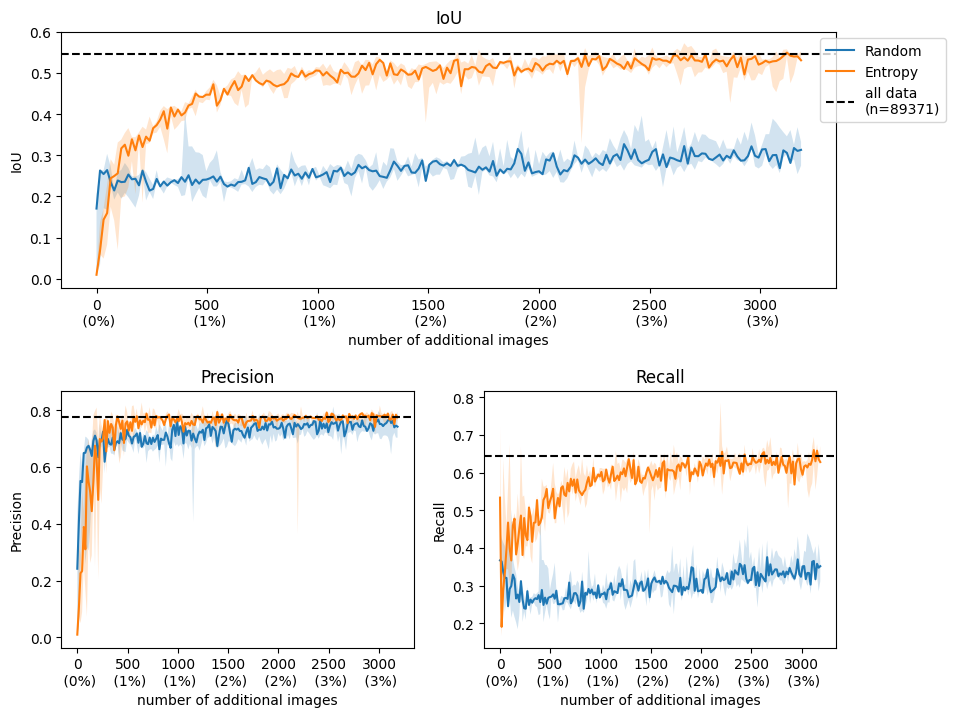

In [20]:
all_data=89371
x_len = 200
def m_plot(ax, metric="dataset_ious", ylabel="IoU"):
    res=defaultdict(dict)
    p_line = np.median([np.load(f"{res_folder}/all/from_scratch/{n_init}_{n_query}_{seed}/RandomSampling/results_perfect_3.npz")[metric] for seed in seeds])
    print(p_line)
    for seed in seeds:#seeds:
        for method in ["RandomSampling", "EntropySampling"]:
            res[seed][method] = np.load(f"{res_folder}/all/from_scratch/{n_init}_{n_query}_{seed}/{method}/result.npz")
                #res_p = np.load(f"{res_folder}/{n_init}_{n_query}_{seed}/{method}/results_perfect.npz")
    round_imgs = None#np.array(range(x_len))*16
    for method in ["RandomSampling", "EntropySampling"]:
        v = np.array([res[seed][method][metric][0:x_len] for seed in seeds])
        print(len(v))
        xs =  np.array(range(x_len))*16
        ax.plot(xs, np.median(v,axis=0), label=method_nice[method])
        ax.fill_between(xs, np.min(v,axis=0), np.max(v,axis=0), alpha=.2)
        if method=="EntropySampling":
            pass
            #print(np.median(v,axis=0))
    ax.set_xlabel("number of additional images")
    ax.set_ylabel(ylabel)

    ax.axhline(p_line, color="black", label=f"all data\n(n={all_data})", linestyle="--")
    
    print(ax.get_xticks())
    x_ticks = ax.get_xticks()[1:-1]

    new_labels = [f"{int(tick)}\n ({(tick/all_data)*100:.0f}%)" for tick in x_ticks]
    ax.set_xticks(x_ticks)
    
    ax.set_xticklabels(new_labels)


        
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
top_plot = fig.add_subplot(2, 2, (1, 2))
lower_left_plot = fig.add_subplot(2, 2, 3)
lower_right_plot = fig.add_subplot(2, 2, 4)
fig.subplots_adjust(hspace=0.4)  # Adjust the height space

# Set titles for each subplot
top_plot.set_title('IoU')
lower_left_plot.set_title('Precision')
lower_right_plot.set_title('Recall')

m_plot(top_plot, "dataset_ious", ylabel="IoU")
m_plot(lower_left_plot, "precisions", ylabel="Precision")
m_plot(lower_right_plot, "recalls", ylabel="Recall")

top_plot.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
plt.savefig(f"{plot_folder}/from_scratch_all.pdf", bbox_inches="tight")